In [1]:
import random
import matplotlib.pyplot as plt
import statistics as st
import math

In [2]:
%matplotlib inline

Let's simulate some die rolls. We're going to see the chance of rolling 12 or higher on n dice.

It's important to note here that anything we simulate with random numbers could be calculated. Simulation is very helpful, though, when the amount of variables make calculation difficult.

#Dice Roll

In [3]:
def roll_die():
    return random.randint(1,6)

def roll_n_dice(n=1):
    return sum(roll_die() for _ in range(n))

In [6]:
roll_n_dice(3)

15

In [10]:
def trial_roll(target, num_dice, num_trials=1000):
    rolls = [roll_n_dice(num_dice) for _ in range(num_trials)]
    successes = len([roll for roll in rolls if roll >= target])
    return successes / num_trials

In [13]:
print("Chance on 2 dice:", trial_roll(12, 2))
print("Chance on 3 dice:", trial_roll(12, 3))
print("Chance on 4 dice:", trial_roll(12, 4))
print("Chance on 5 dice:", trial_roll(12, 5))


Chance on 2 dice: 0.0292
Chance on 3 dice: 0.3758
Chance on 4 dice: 0.7617
Chance on 5 dice: 0.9443


In [14]:
print("Chance on 2 dice:", trial_roll(12, 2, 10))
print("Chance on 3 dice:", trial_roll(12, 3, 10))
print("Chance on 4 dice:", trial_roll(12, 4, 10))
print("Chance on 5 dice:", trial_roll(12, 5, 10))


Chance on 2 dice: 0.1
Chance on 3 dice: 0.5
Chance on 4 dice: 0.8
Chance on 5 dice: 1.0


In [15]:
print("Chance on 2 dice:", trial_roll(12, 2, 100000))
print("Chance on 3 dice:", trial_roll(12, 3, 100000))
print("Chance on 4 dice:", trial_roll(12, 4, 100000))
print("Chance on 5 dice:", trial_roll(12, 5, 100000))

Chance on 2 dice: 0.02761
Chance on 3 dice: 0.37591
Chance on 4 dice: 0.76287
Chance on 5 dice: 0.94137


#ATM Simulation

Every Friday, you go to the ATM to deposit checks. There's a lot of people who do this and so the line can be long -- an average of 3 people, but as many as 6 or as few as 0. Each person in front of you in line takes about 2 minutes, but they sometimes take as long as 5 minutes and never take less than 1 minute. You need to know how long of a wait to expect.

I'm using a normal distribution for the number of customers and their wait times, but am putting a lower limit on each. The number of customers is a normal distribution with μ of 3 and σ of 1, but always an integer and never less than 0, and the time for each customer is a normal distribution with μ of 2 minutes and σ of 1 minute, but never less than 1 minute.


In [16]:
num_customers = lambda: max(0, int(random.gauss(3,1)))
time_at_atm = lambda: max(1, random.gauss(2,1))

In [17]:
def sample_atm_time():
    return sum(time_at_atm() for _ in range(num_customers()))

In [23]:
sample_atm_time()

3.465138234243061

In [28]:
def atm_trials(num_trials=10000):
    return [sample_atm_time() for _ in range(num_trials)]

In [29]:
trials = atm_trials()

In [30]:
st.mean(trials)

5.251032685038573

In [31]:
st.pstdev(trials)

2.5778935958097695

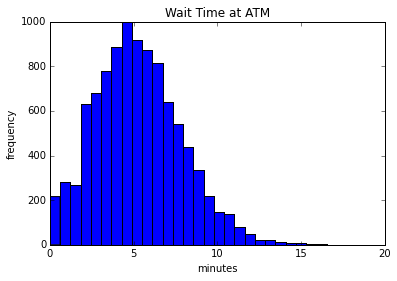

In [32]:
plt.hist(trials, bins=30)
plt.xlabel("minutes")
plt.ylabel("frequency")
plt.title("Wait Time at ATM")
plt.show()